In [7]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import time

In [8]:
(x, y, z, v, w, t) = sp.symbols("x y z v w t")

In [9]:
variables = (v, w, x, y, z)
# LA CANTIDAD DE VARIABLES SIMBOLICAS Y VALORES DEBEN SER LOS MISMOS
f = lambda x, y: 3 * x**2 + 2 * y**2 + x + 10

f2 = (
    lambda v, w, x, y, z: 2 * (v - 3 * z) ** 3
    + 15 * w**2
    + 0.3 * x**2
    + 2 * y**2
    - 6 * v**3
    - 2 * z**2
    + 0.5 * w**2
)


# El ultimo parametro indica cuantos valores se quieren generar en el array, es mejor que declarar las variables una por una


def newton_raphson_method(
    function: any,
    variables: list[any] | tuple[any],
    point: list[float] | tuple[float],
    tol: float = 0.01,
    min_value: float = 1e9,
    max_iter: int = 100,
    print_solutions: bool = False,
) -> None:

    expression = function(*variables)
    grad = [sp.diff(expression, var) for var in variables]
    H = sp.hessian(expression, variables)

    for i in range(max_iter):

        J = [g.subs(zip(variables, point)) for g in grad]
        H_eval = H.subs(zip(variables, point))
        current_value = function(*point)

        if abs(min_value - current_value) < tol:
            solution = (current_value, tuple(point))

            if print_solutions:
                print(f"Solucion {solution}\nIteraciones: {i}")

            return solution

        min_value = current_value

        H_eval = H.subs(zip(variables, point))
        H_eval = np.array(H_eval, dtype="float")
        H_inv = np.linalg.inv(H_eval)
        point = point - H_inv @ J

In [10]:
newton_raphson_method(f, (x, y), (5, 5), print_solutions=True)

Solucion (9.91666666666667, (-0.166666666666667, 0))
Iteraciones: 2


(9.91666666666667, (-0.166666666666667, 0))

## Guia 5

1.

In [11]:
f1 = lambda x, y: 13*x**2 + 16*y**2 + x + 15
newton_raphson_method(f1, (x, y), (2, 3), max_iter=100, print_solutions=True)

Solucion (14.9807692307692, (-0.0384615384615385, 0))
Iteraciones: 2


(14.9807692307692, (-0.0384615384615385, 0))

2.

In [12]:
f2 = lambda x, y, z: 4*x**2 + 16*y**2 + 4*z**2 + 12*z + 45
newton_raphson_method(f2, (x, y, z), (10, 15, 30), max_iter=150, tol=0.001, min_value=1e6, print_solutions=True)

Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2


(36.0000000000000, (0, 0, -1.50000000000000))

3.

In [13]:
f3 = (
    lambda x, y, z, w, t, v: 17 * x**4
    + 16 * y**4
    + 4 * z**2
    + 12 * w**3
    + t**2
    + v**2
    + 2 * x
    + 4 * y * 45 * v
    + 3 * x * y * z * w * t * v
    + 2
)

variables = (x, y, z, w, t, v)
initial_point = (0, 10, 20, 30, 40, 50)

newton_raphson_method(
    f3, variables, initial_point, tol=0.001, min_value=1e5, max_iter=100
)

(1.53698412691869, (-0.308683374387644, 0, 0, 0.00597985389506094, 0, 0))

4. 

In [14]:
import time


def newton_random(
    function: any,
    variables: list[any] | tuple[any],
    initial_bounds: tuple[float] | list[float],
    tol: float = 0.01,
    min_value: float = 1e9,
    max_iters: list[int] = [100],
    num_random_points: int = 10,
    get_time: bool = False,
    print_solutions: bool = False,
) -> tuple:

    info_collected = {}
    time_dict = {}

    if isinstance(max_iters, int):
        max_iters = [max_iters]

    for i in max_iters:
        start_time = time.perf_counter()
        solutions = []
        for _ in range(num_random_points):
            random_point = np.random.uniform(*initial_bounds, len(variables))

            solution = newton_raphson_method(
                function, variables, random_point, tol, min_value, i, print_solutions
            )
            if solution:
                solutions.append(solution)
        
        info_collected[i] = solutions
        
        end_time = time.perf_counter() - start_time
        time_dict[i] = end_time

    if get_time:
        return info_collected, time_dict

    return info_collected


initial_bounds = -1e5, 1e4
newton_random(f1, (x, y), initial_bounds)

{100: [(14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0)),
  (14.9807692307692, (-0.0384615384615385, 0))]}

In [15]:
initial_bounds = -20000, 10000
newton_random(f2, (x, y, z), initial_bounds, tol=0.01, print_solutions=True)

Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2
Solucion (36.0000000000000, (0, 0, -1.50000000000000))
Iteraciones: 2


{100: [(36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000)),
  (36.0000000000000, (0, 0, -1.50000000000000))]}

In [16]:
def gradient_descent_method(
    function: callable,
    variables: list[any] | tuple[any],
    point: list[float] | tuple[float],
    alpha: float = 0.01,
    tol: float = 0.01,
    min_value: float = 1e9,
    max_iter: int = 100,
    print_solutions: bool = False,
) -> tuple[float, tuple]:

    expression = function(*variables)
    grad = [sp.diff(expression, var) for var in variables]

    for i in range(max_iter):

        # Se ve feo, pero es solo para estandarizar el formato
        J = np.array([float(g.subs(dict(zip(variables, point)))) for g in grad])
        current_value = float(expression.subs(dict(zip(variables, point))))

        if np.isnan(current_value) or np.isinf(current_value):
            break

        if abs(min_value - current_value) < tol:
            solution = (current_value, tuple(point))

            if print_solutions:
                print(f"Solucion {solution}\nIteraciones: {i}")

            return solution

        min_value = current_value

        point = (
            np.array(point, dtype="float") - alpha * J
        )  # Se aplica la formula y se actualiza el punto

    return None


f5 = lambda x, y: x**2 + y**2

gradient_descent_method(f5, (x, y), [1, 1], print_solutions=True)

Solucion (0.23496004628586892, (0.34275358954055385, 0.34275358954055385))
Iteraciones: 53


(0.23496004628586892, (0.34275358954055385, 0.34275358954055385))

1. 

In [17]:
import time


def gradient_method_random(
    function: callable,
    variables: list[any] | tuple[any],
    initial_bounds: tuple[float] | list[float],
    alpha: float = 0.01,
    tol: float = 0.001,
    min_value: float = 1e9,
    max_iters: list[int] = [100],
    num_random_points: int = 10,
    get_time: bool = False,
    print_solutions: bool = False
) -> tuple:
    info_collected = {}
    time_dict = {}

    if isinstance(max_iters, int):
        max_iters = [max_iters]

    for i in max_iters:
        start_time = time.perf_counter()
        solutions = []

        for _ in range(num_random_points):
            random_point = np.random.uniform(*initial_bounds, len(variables))

            solution = gradient_descent_method(
                function, variables, random_point, alpha, tol, min_value, i, print_solutions
            )
            if solution:
                solutions.append(solution)

        info_collected[i] = solutions

        end_time = time.perf_counter() - start_time
        time_dict[i] = end_time
    if get_time:
        return info_collected, time_dict

    return info_collected

In [18]:
f4 = lambda x, y, z: x**2 + y**2 + z
gradient_method_random(f4, (x, y, z), initial_bounds=(-20, 20), alpha=0.001, tol=0.1, get_time=True)

({100: []}, {100: 2.014908999990439})

2.

In [19]:
f5 = lambda x, y: (x**2+ y - 11)**2 + (x + y**2 - 7)**2
gradient_method_random(f5, (x, y), initial_bounds=(-20, 20),alpha=0.001, tol=0.0001)

{100: [(0.0005525860062007594, (-3.7814005150765135, -3.2865391476896466)),
  (0.0006388146342480799, (-2.8088139804686016, 3.13357226263895)),
  (0.0005797837070527839, (-3.7770961256833213, -3.279794175139483)),
  (0.0005484962662906812, (-3.7813944571048075, -3.2865256651859527)),
  (0.0006633878470131861, (-2.809421821401521, 3.1326151189671823)),
  (0.0005499982017843073, (-3.777305264410884, -3.2797882411662154)),
  (0.0006167835133873956, (-2.808927140105946, 3.1332731658658193))]}

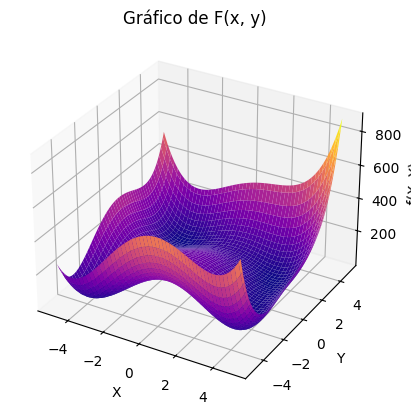

In [20]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f5(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Gráfico de F(x, y)')

plt.show()

3.

In [21]:
(x, y, z, w, v) = sp.var("x y z w v")

f6 = lambda x, y, z, w, v: x + 2 * y**2 + z - w * v
# gradient_method_random(
#     f6,
# (x, y, z, w, v),
#     initial_bounds=(-20.0, 20.0),
#     alpha=0.001,
#     tol=0.1,
#     max_iter=500,
#     num_random_points=100,
# )

4.

In [22]:
solutions, times = gradient_method_random(
    f6,
(x, y, z, w, v),
    initial_bounds=(-20.0, 20.0),
    alpha=0.001,
    tol=0.01,
    max_iters=[5, 10, 15, 25, 40, 50],
    num_random_points=100,
    get_time=True
)


KeyboardInterrupt: 

Text(0, 0.5, 'Tiempo de Cómputo')

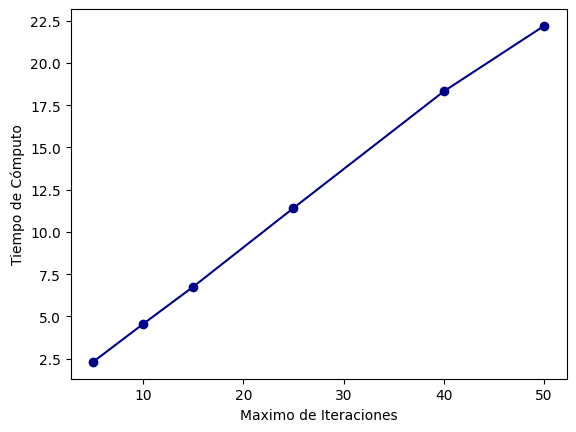

In [ ]:
plt.plot(times.keys(), times.values(), "o-", color = "darkblue")
plt.xlabel("Maximo de Iteraciones")
plt.ylabel("Tiempo de Cómputo")

In [ ]:
f7 = lambda x, y: 14 * x**2 - 2 * x**3 + 2 * y**2 + 4 * x * y

solutions, times = gradient_method_random(
    f7,
    (x, y),
    initial_bounds=(-10, 10),
    num_random_points=200,
    max_iters=[10, 20, 30, 40, 50, 100],
    tol=0.001,
    get_time=True,
)

In [ ]:
def find_min_max(solutions: dict[float, list[tuple]]) -> tuple[tuple]:
    min_solution = None
    max_solution = None

    for values in solutions.values():
        for value in values:
            if min_solution is None or value[0] < min_solution[0]:
                min_solution = value
            if max_solution is None or value[0] > max_solution[0]:
                max_solution = value

    return min_solution, max_solution


find_min_max(solutions)

((0.0006316878039726203, (0.007139917786685853, -0.003924746290007759)),
 (0.014153484871680652, (-0.014662264097271989, 0.09071289448519507)))

In [ ]:
f8 = lambda x, y: (x**2 + y - 11) ** 2 + (x + y**2 - 7) ** 2
f8_solutions, f8_times = gradient_method_random(
    f8,
    (x, y),
    initial_bounds=(-10, 10),
    num_random_points=200,
    alpha=0.001,
    tol=0.0001,
    max_iters=100,
    get_time=True,
)

In [ ]:
def clean_solutions(
    solutions: dict[int, list[tuple]], decimal_places: int = 3
) -> dict[int, list[tuple]]:
    cleaned_solutions = {}

    for key, value_list in solutions.items():
        unique_values = []
        seen_values = set()

        for value, point in value_list:
            rounded_value = round(value, decimal_places)
            if rounded_value not in seen_values:
                seen_values.add(rounded_value)
                unique_values.append((value, point))

        cleaned_solutions[key] = unique_values

    return cleaned_solutions

In [ ]:
f8_cleaned_sol = clean_solutions(f8_solutions)

find_min_max(f8_cleaned_sol)


((0.00036915507861425565, (-3.7767524158856265, -3.281716485291488)),
 (0.0015761207321748987, (3.585404080872308, -1.85853421605885)))